In [13]:
# load data for ssps on a global level which I (Yannick Oswald) have created
# import from the data folder and ssps subfolder the file world_level_carbon_intensity_decline
# and return the data in a dictionary
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

def load_data():
  # Replace 'your/path/to/data' with the actual path to the 'data' folder
    data_path = os.path.join('.\data\ssps\world_level_carbon_intensity_decline.csv')
    data = pd.read_csv(data_path, sep=';')

    return data

def get_data():
    return load_data()

data = get_data()

#Now for all rows plot the data every row as a boxplot with the label of in first column as title

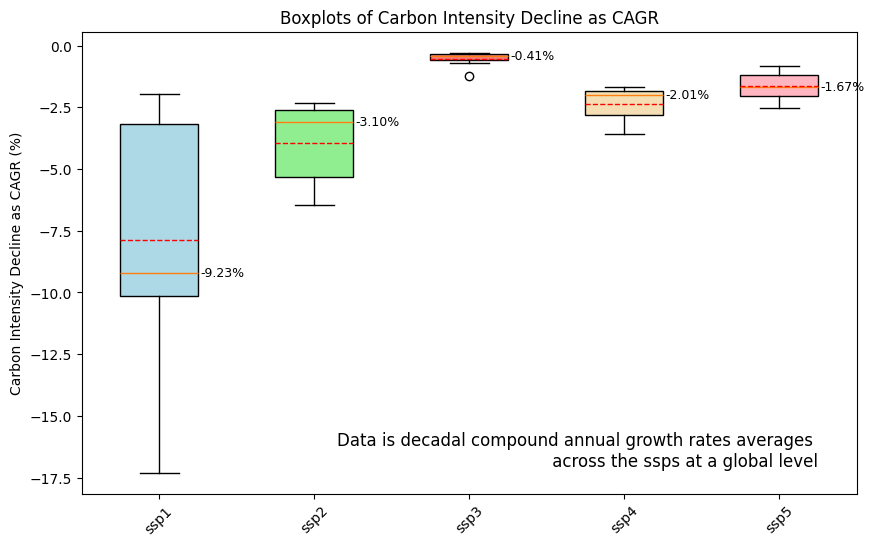

<Figure size 640x480 with 0 Axes>

In [14]:



# Assuming 'data' is already a pandas DataFrame
# Collect all numeric rows
boxplot_data = []
labels = ['ssp1', 'ssp2', 'ssp3', 'ssp4', 'ssp5']  # Specific labels for each boxplot

for index, row in data.iterrows():
    # Extract numeric values and convert to percentages
    numeric_values = [value * 100 for value in row if isinstance(value, (int, float))]
    if numeric_values:  # Check if there are any numeric values to plot
        boxplot_data.append(numeric_values)

# Define a list of colors for the boxplots
colors = ['lightblue', 'lightgreen', 'lightcoral', 'wheat', 'lightpink']

# Plot all boxplots on one figure
if boxplot_data:  # Check if there is anything to plot
    plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
    boxplot_elements = plt.boxplot(boxplot_data, patch_artist=True, meanline=True, showmeans=True, meanprops={'color':'red', 'linestyle':'--'})  # Enable color filling
    plt.title('Boxplots of Carbon Intensity Decline as CAGR')  # General title for the whole plot

    # Coloring each boxplot*
    for patch, color in zip(boxplot_elements['boxes'], colors):
        patch.set_facecolor(color)

    # Setting labels for the x-axis and rotating them
    plt.xticks(ticks=np.arange(1, len(labels) + 1), labels=labels, rotation=45)

     # Add annotation text in the lower right corner
    plt.text(0.95, 0.05, "Data is decadal compound annual growth rates averages \n across the ssps at a global level",
             verticalalignment='bottom', horizontalalignment='right',
             transform=plt.gca().transAxes, color='black', fontsize=12)
    
    # Annotate median values next to each boxplot
    for i, data in enumerate(boxplot_data):
        median_value = np.median(data)
        # Position the text to the right of the median marker of the i-th boxplot
        plt.annotate(f'{median_value:.2f}%', (i + 1, median_value), textcoords="offset points", 
                     xytext=(30, 0), ha='left', va='center', fontsize=9)
        

    # Label the y-axis
    plt.ylabel('Carbon Intensity Decline as CAGR (%)')

    plt.show()

    plt.savefig('supp_fig1.png')
